In [1]:
#!zypper --non-interactive in --no-recommends libpango-1_0-0 libharfbuzz0 libgthread-2_0-0
# # Extra dependencis
# !zypper --non-interactive in --no-recommends gcc gcc-c++ zlib-devel libffi-devel libjpeg-turbo openjpeg2 openjpeg2-devel

In [2]:
# !pip install opencv-python python-doctr fonttools

In [58]:
import cv2
import matplotlib.pyplot as plt
from doctr.io import DocumentFile
from doctr.models import ocr_predictor
from doctr.utils.visualization import visualize_page


In [71]:
# Load the OCR model
model = ocr_predictor(pretrained=True)

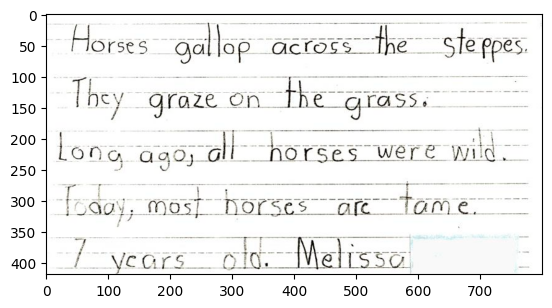

In [69]:
# Load the image
img_path = '../_data/resource/note_child.jpg'
img = cv2.imread(img_path)
plt.imshow(img)

## doctr perform OCR on np array

In [87]:
# OCR from image path
doc = DocumentFile.from_images(img_path)
res_doc = model(doc)

In [75]:
# OCR from image
res_image = model([img])

## Visualize

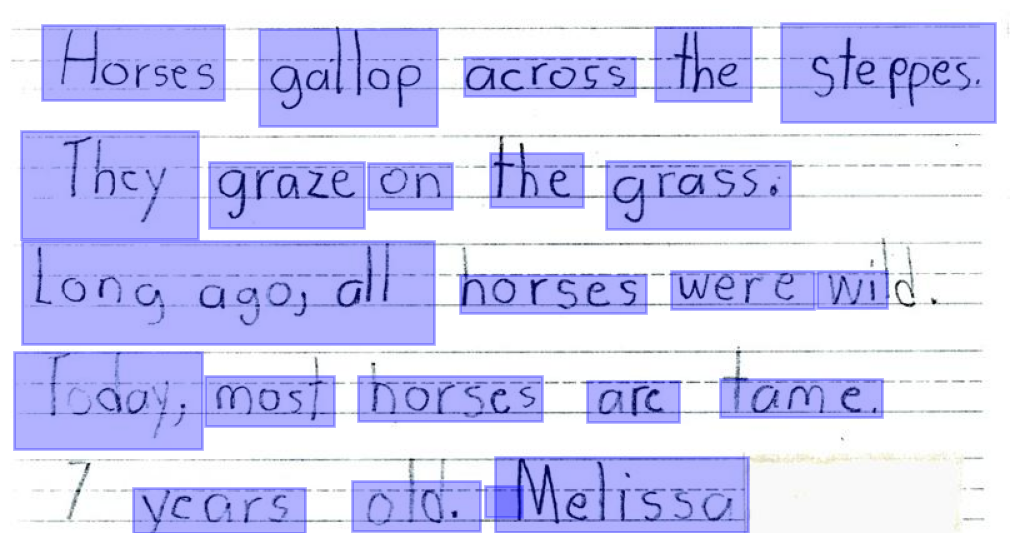

In [100]:
visualize_page(res_doc.pages[0].export(), doc[0])
plt.show()

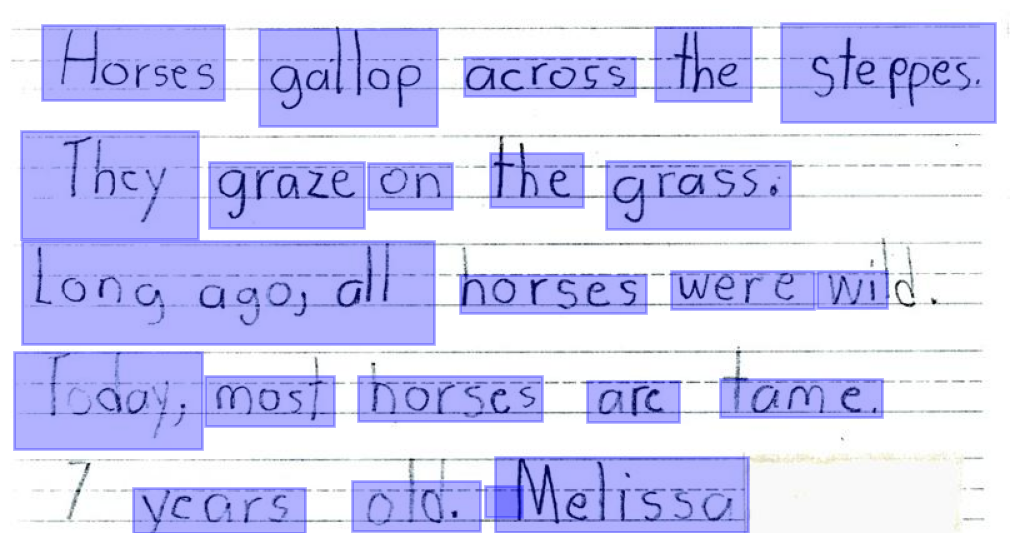

In [89]:
visualize_page(res_image.pages[0].export(), img)
plt.show()

## OCR result

In [101]:
res_doc

Document(
  (pages): [Page(
    dimensions=(419, 800)
    (blocks): [
      Block(
        (lines): [Line(
          (words): [Word(value='Horses', confidence=0.99)]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [Line(
          (words): [
            Word(value='galop', confidence=0.84),
            Word(value='across', confidence=0.41),
            Word(value='The', confidence=0.57),
            Word(value='steppes', confidence=0.56),
          ]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [Line(
          (words): [
            Word(value='They', confidence=0.6),
            Word(value='graze', confidence=0.64),
            Word(value='on', confidence=0.83),
          ]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [Line(
          (words): [
            Word(value='the', confidence=0.8),
            Word(value='grass,', confidence=0.43),
          ]
        )]
        (artefacts): []
      ),
    

In [103]:
model_crnn = ocr_predictor(det_arch = 'db_resnet50',
                          reco_arch = 'crnn_vgg16_bn',
                          pretrained = True)

In [104]:
res_crnn = model_crnn(doc)
res_crnn

Document(
  (pages): [Page(
    dimensions=(419, 800)
    (blocks): [
      Block(
        (lines): [Line(
          (words): [Word(value='Horses', confidence=0.99)]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [Line(
          (words): [
            Word(value='galop', confidence=0.84),
            Word(value='across', confidence=0.41),
            Word(value='The', confidence=0.57),
            Word(value='steppes', confidence=0.56),
          ]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [Line(
          (words): [
            Word(value='They', confidence=0.6),
            Word(value='graze', confidence=0.64),
            Word(value='on', confidence=0.83),
          ]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [Line(
          (words): [
            Word(value='the', confidence=0.8),
            Word(value='grass,', confidence=0.43),
          ]
        )]
        (artefacts): []
      ),
    

# Denoised image

In [138]:
def salt_pepper_noise_removal(image_path, kernel_size=3):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Convert the image from BGR to RGB
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Apply a median filter to remove salt and pepper noise
    denoised_image = cv2.medianBlur(rgb_image, kernel_size)

    return denoised_image

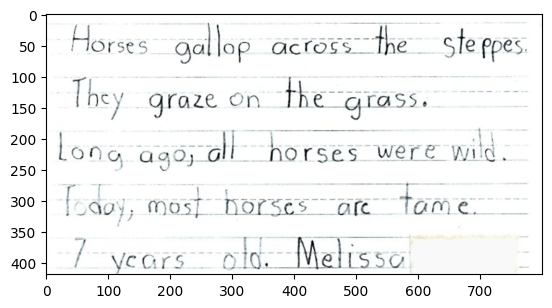

In [150]:
img_denoised = salt_pepper_noise_removal(img_path)
plt.imshow(img_denoised)

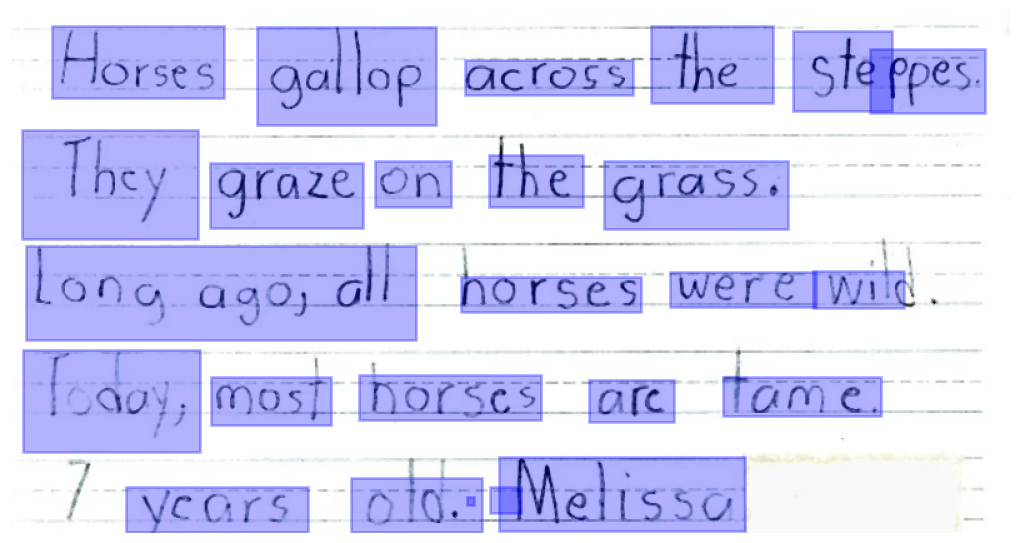

In [149]:
res_denoised = model([img_denoised])
visualize_page(res_denoised.pages[0].export(), img_denoised)
plt.show()

In [142]:
res_denoised

Document(
  (pages): [Page(
    dimensions=(419, 800)
    (blocks): [
      Block(
        (lines): [Line(
          (words): [
            Word(value='Horses', confidence=0.99),
            Word(value='galop', confidence=0.8),
            Word(value='across', confidence=0.32),
            Word(value='the', confidence=0.74),
            Word(value='ste', confidence=0.99),
            Word(value='ppes.', confidence=0.75),
          ]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [Line(
          (words): [
            Word(value='They', confidence=0.52),
            Word(value='graze', confidence=0.6),
            Word(value='On', confidence=0.87),
          ]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [Line(
          (words): [
            Word(value='the', confidence=0.68),
            Word(value='grass.', confidence=0.73),
          ]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [Line(
          